In [2]:
from glob import glob
import os
import numpy as np
from typing import List
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data.dataset import Dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
input_dir = "/home/nbaranov/projects/04_cv/MedicalImageAnalysis/data/small_data/small/"
f_size = (14,8)

t1_dir = os.path.join(input_dir, 't1')
t2_dir = os.path.join(input_dir, 't2')

1.  Create a function that takes a tuple of two images and returns a tuple of the same two cropped (or, equivalently, a patch from the) images, where the cropped images are of the same randomly determined location.

2.  Verify that this was implemented correctly by visualizing the output images as in the previous module.
Create a class that inherits from Dataset to handle the NIfTI files.

In [5]:
class NiftiDataset(Dataset):
    def __init__(self, source_dir, target_dir, transforms=None):
        self.source_dir = source_dir
        self.target_dir = target_dir
        self.transforms = transforms
        self.source_images = glob(os.path.join(self.source_dir, '*.nii*'))
        self.targets = glob(os.path.join(self.target_dir, '*.nii*'))

    def __len__(self):
        return len(self.source_images)

    def __getitem__(self, idx):
        img = nib.load(self.source_images[idx]).get_fdata()
        target = nib.load(self.targets[idx]).get_fdata()
        if self.transforms is not None:
            img = self.transforms(img)
            target = self.transforms(target)
        return img, target

In [6]:
ds = NiftiDataset(source_dir=t1_dir, target_dir=t2_dir)

In [7]:
ds.__len__()

28

In [8]:
img1, img2 = ds.__getitem__(0)
assert img1.shape == img2.shape and img1.shape != 0
print(img1.shape)

(120, 120, 90)


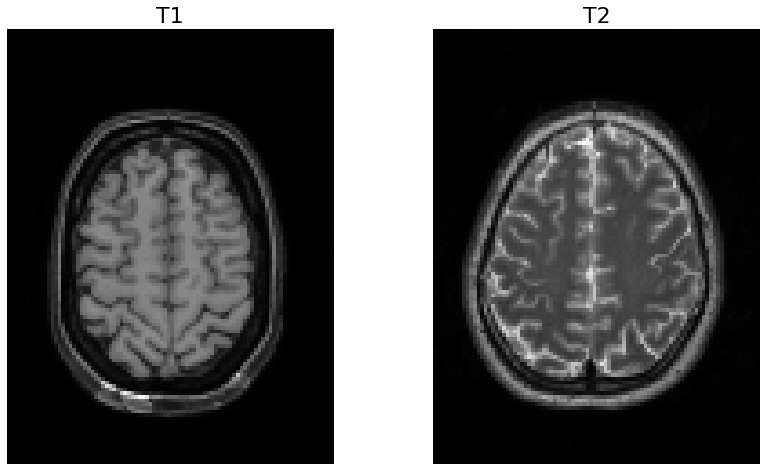

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=f_size)
ax1.imshow(img1[:,90,:], cmap='gray')
ax1.set_title('T1', fontsize=22)
ax1.axis('off')

ax2.imshow(img2[:,90,:], cmap='gray')
ax2.set_title('T2', fontsize=22)
ax2.axis('off');

In [10]:
class RandomCrop3D:
    def __init__(self, output_size: int):
        self.output_size = output_size

    def __call__(self, sample, target):
        return self.random_crop(sample, target)

    def random_crop(self, sample, target):
        start_x = np.random.randint(0, sample.shape[0] - self.output_size + 1)
        start_y = np.random.randint(0, sample.shape[1] - self.output_size + 1)

        sample = sample[start_x: start_x + self.output_size,
                              start_y: start_y + self.output_size, :]
        target = target[start_x: start_x + self.output_size,
                  start_y: start_y + self.output_size, :]

        # sample = np.moveaxis(sample, 2, 0)
        # target = np.moveaxis(target, 2, 0)

        return sample, target

In [11]:
random_crop = RandomCrop3D(output_size=32)

(32, 32, 90)


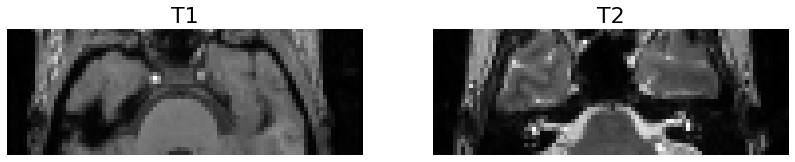

In [23]:
t1_crop, t2_crop = random_crop(img1, img2)
assert t1_crop.shape == t2_crop.shape and t1_crop.shape != 0
print(t1_crop.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=f_size)
ax1.imshow(t1_crop[:,15,:], cmap='gray')
ax1.set_title('T1', fontsize=22)
ax1.axis('off')

ax2.imshow(t2_crop[:,15,:], cmap='gray')
ax2.set_title('T2', fontsize=22)
ax2.axis('off');

(32, 32, 90)


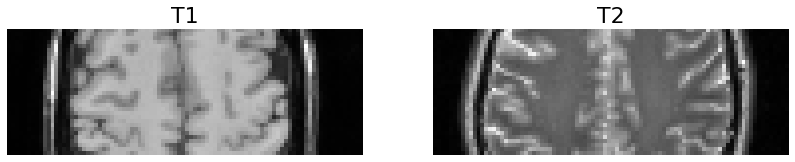

In [28]:
t1_crop, t2_crop = random_crop(img1, img2)
assert t1_crop.shape == t2_crop.shape and t1_crop.shape != 0
print(t1_crop.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=f_size)
ax1.imshow(t1_crop[:,15,:], cmap='gray')
ax1.set_title('T1', fontsize=22)
ax1.axis('off')

ax2.imshow(t2_crop[:,15,:], cmap='gray')
ax2.set_title('T2', fontsize=22)
ax2.axis('off');